# Question 8: Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_2022.csv contains historical weather data recorded at Nashville International Airport.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
headway = pd.read_csv('../Data/Headway Data.csv')

In [3]:
weather = pd.read_csv('../Data/bna_weather.csv')

stripped hour from data column to merge the two datasets

In [4]:
headway['NEW_DATE']=headway.DATE
headway['NEW_DATE']= pd.to_datetime(headway.NEW_DATE)
headway['HOUR']=headway.SCHEDULED_TIME.str.slice(0,2).astype(str)

In [5]:
weather['HOUR']=weather.Date.str.slice(11,13).astype(str)
weather['NEW_DATE']=weather.Date.str.slice(0,10).astype(str)
weather['NEW_DATE']= pd.to_datetime(weather.NEW_DATE)

In [6]:
merge_df = headway.merge(weather, on=['NEW_DATE','HOUR'], how= "left")
merge_df

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210133,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210134,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210135,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
merge_df_a = merge_df.drop_duplicates(['ADHERENCE_ID'])

In [8]:
merge_df_a.keys()

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'NEW_DATE', 'HOUR', 'Date', 'key', 'class',
       'expire_time_gmt', 'obs_id', 'obs_name', 'valid_time_gmt', 'day_ind',
       'temp', 'wx_icon', 'icon_extd', 'wx_phrase', 'pressure_tend',
       'pressure_desc', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wc',
       'wdir', 'wdir_cardinal', 'gust', 'wspd', 'max_temp', 'min_temp',
       'precip_total', 'precip_hrly', 'snow_hrly', 'uv_desc', 'feels_like',
   

In [9]:
merge_df_b= merge_df_a[['NEW_DATE', 'HOUR','DATE','Date', 'ROUTE_ABBR','TRIP_ID',
       'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV',
       'temp', 'heat_index', 'precip_hrly']]

In [10]:
merge_df['precip_hrly'].isna().sum()

33913

In [11]:
merge_df_a[['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS', 'NEW_DATE', 'HOUR', 'Date', 'key', 'class',
       'expire_time_gmt', 'obs_id', 'obs_name', 'valid_time_gmt', 'day_ind',
       'temp', 'wx_icon', 'icon_extd', 'wx_phrase', 'pressure_tend',
       'pressure_desc', 'dewPt', 'heat_index', 'rh', 'pressure', 'vis', 'wc',
       'wdir', 'wdir_cardinal', 'gust', 'wspd', 'max_temp', 'min_temp',
       'precip_total', 'precip_hrly', 'snow_hrly', 'uv_desc', 'feels_like',
       'uv_index', 'qualifier', 'qualifier_svrty', 'blunt_phrase',
       'terse_phrase', 'clds', 'water_temp', 'primary_wave_period',
       'primary_wave_height', 'primary_swell_period', 'primary_swell_height',
       'primary_swell_direction', 'secondary_swell_period',
       'secondary_swell_height', 'secondary_swell_direction']]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,BKN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,SCT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210132,120221101,1,91057724,2022-11-01,50,9302,2355,329980,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210133,120221101,1,91057851,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210134,120221101,1,91057852,2022-11-01,50,9950,1880,330003,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210135,120221101,1,91057881,2022-11-01,56,9975,1922,330011,0,TO DOWNTOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# headway_i['DEV_PERCENT'] = headway_i.HDWY_DEV/headway_i.SCHEDULED_HDWY * 100

In [14]:
merge_df_b['DEV_PERCENT'] = merge_df_b.HDWY_DEV/merge_df_b.SCHEDULED_HDWY * 100

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_16788\3310893890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df_b['DEV_PERCENT'] = merge_df_b.HDWY_DEV/merge_df_b.SCHEDULED_HDWY * 100


In [15]:
merge_df_b['BUNCH/GAP']=''

merge_df_b.loc[merge_df_b['DEV_PERCENT'] >50, 'BUNCH/GAP']= 'gap'
merge_df_b.loc[merge_df_b['DEV_PERCENT'] <-50, 'BUNCH/GAP']= 'bunch'

merge_df_b.head(50)

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_16788\3229422113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df_b['BUNCH/GAP']=''


,NEW_DATE,HOUR,DATE,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT,BUNCH/GAP
0,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,62.0,62.0,0.0,14.166664,
1,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,62.0,62.0,0.0,23.809521,
2,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,62.0,62.0,0.0,NaN,
3,2021-11-01,15,2021-11-01,2021-11-01 15:53:00,50,297749,TO DOWNTOWN,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,62.0,62.0,0.0,NaN,
4,2021-11-01,15,2021-11-01,2021-11-01 15:53:00,50,297749,TO DOWNTOWN,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,62.0,62.0,0.0,NaN,
5,2021-11-01,04,2021-11-01,2021-11-01 04:53:00,22,298143,TO DOWNTOWN,04:42:00,04:29:30,04:41:50,0.166666,NaN,NaN,NaN,45.0,45.0,0.0,NaN,
6,2021-11-01,04,2021-11-01,2021-11-01 04:53:00,22,298143,TO DOWNTOWN,04:46:00,04:46:58,04:46:58,-0.966666,NaN,NaN,NaN,45.0,45.0,0.0,NaN,
7,2021-11-01,04,2021-11-01,2021-11-01 04:53:00,22,298143,TO DOWNTOWN,04:54:00,04:55:00,04:55:00,-1.000000,NaN,NaN,NaN,45.0,45.0,0.0,NaN,
8,2021-11-01,05,2021-11-01,2021-11-01 05:53:00,22,298143,TO DOWNTOWN,05:10:00,05:05:26,05:05:26,4.566666,NaN,NaN,NaN,46.0,46.0,0.0,NaN,
9,2021-11-01,05,2021-11-01,2021-11-01 05:53:00,22,298162,FROM DOWNTOWN,05:15:00,05:05:26,05:16:49,-1.816666,NaN,NaN,NaN,46.0,46.0,0.0,NaN,


In [16]:
merge_df_c = merge_df_b.sort_values(by='BUNCH/GAP', ascending=False)
merge_df_c.head(50)


,NEW_DATE,HOUR,DATE,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT,BUNCH/GAP
1527749,2022-07-12,13,2022-07-12,2022-07-12 13:53:00,56,314471,FROM DOWNTOWN,13:33:00,13:39:03,13:39:03,-6.050000,10.0,16.933333,6.933333,94.0,99.0,0.0,69.333330,gap
756325,2022-03-09,07,2022-03-09,2022-03-09 07:13:00,55,305038,FROM DOWNTOWN,07:25:00,07:48:06,07:50:33,-25.550000,10.0,34.150000,24.150000,39.0,39.0,0.0,241.500000,gap
81325,2021-11-15,06,2021-11-15,2021-11-15 06:53:00,23,298476,TO DOWNTOWN,06:09:00,06:16:38,06:16:38,-7.633333,12.0,19.050000,7.050000,32.0,32.0,0.0,58.750000,gap
81324,2021-11-15,06,2021-11-15,2021-11-15 06:53:00,23,298476,TO DOWNTOWN,06:03:00,06:04:29,06:09:41,-6.683333,12.0,18.033333,6.033333,32.0,32.0,0.0,50.277775,gap
513174,2022-01-28,11,2022-01-28,2022-01-28 11:53:00,55,305003,TO DOWNTOWN,11:46:00,11:25:55,11:47:39,-1.650000,10.0,20.116666,10.116666,41.0,41.0,0.0,101.166660,gap
513172,2022-01-28,11,2022-01-28,2022-01-28 11:53:00,55,304996,FROM DOWNTOWN,11:20:00,11:20:58,11:20:58,-0.966666,10.0,19.633333,9.633333,41.0,41.0,0.0,96.333330,gap
1712010,2022-08-10,15,2022-08-10,2022-08-10 15:00:00,56,319483,FROM DOWNTOWN,15:15:00,15:01:37,15:23:21,-8.350000,10.0,15.050000,5.050000,75.0,75.0,0.0,50.500000,gap
513171,2022-01-28,11,2022-01-28,2022-01-28 11:53:00,55,304996,FROM DOWNTOWN,11:13:00,11:13:20,11:13:20,-0.333333,10.0,18.800000,8.800000,41.0,41.0,0.0,88.000000,gap
903935,2022-04-04,07,2022-04-04,2022-04-04 07:53:00,56,309970,TO DOWNTOWN,07:05:00,07:01:24,07:05:31,-0.516666,10.0,17.483333,7.483333,48.0,48.0,0.0,74.833330,gap
513170,2022-01-28,11,2022-01-28,2022-01-28 11:53:00,55,304996,FROM DOWNTOWN,11:07:00,11:03:56,11:07:31,-0.516666,10.0,20.383333,10.383333,41.0,41.0,0.0,103.833330,gap


In [25]:
# subset =gdp_and_internet_use.loc[gdp_and_internet_use['Year'].isin([2004,2009,2014])]
# df.sort_values(['a', 'b'], ascending=[True, False])

below_freezing=merge_df_b.loc[merge_df_b['temp']<32]
below_freezing

below_freezing = below_freezing.sort_values(['DEV_PERCENT', 'temp'], ascending=[False, True])
below_freezing.head(50)

,NEW_DATE,HOUR,DATE,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT,BUNCH/GAP
476672,2022-01-21,15,2022-01-21,2022-01-21 15:53:00,55,305555,TO DOWNTOWN,15:12:00,14:58:41,15:12:03,-0.050000,0.0,0.133333,0.133333,28.0,28.0,0.00,inf,gap
476998,2022-01-21,15,2022-01-21,2022-01-21 15:53:00,56,306137,TO DOWNTOWN,15:20:00,15:04:03,15:19:29,0.516666,0.0,4.716666,4.716666,28.0,28.0,0.00,inf,gap
382494,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,22,302736,TO DOWNTOWN,17:39:00,17:26:29,17:26:29,12.516666,10.0,310.533333,300.533333,22.0,22.0,0.01,3005.333330,gap
396070,2022-01-07,16,2022-01-07,2022-01-07 16:53:00,50,304120,FROM DOWNTOWN,16:15:00,16:15:16,16:15:16,-0.266666,15.0,465.500000,450.500000,22.0,22.0,0.00,3003.333333,gap
477398,2022-01-22,20,2022-01-22,2022-01-22 20:53:00,23,302950,FROM DOWNTOWN,20:51:00,20:50:58,20:50:58,0.033333,30.0,544.916666,514.916666,27.0,27.0,0.00,1716.388887,gap
601210,2022-02-12,20,2022-02-12,2022-02-12 20:53:00,22,302578,TO DOWNTOWN,20:52:00,20:51:25,20:51:25,0.583333,33.0,591.466666,558.466666,29.0,29.0,0.00,1692.323230,gap
477541,2022-01-22,20,2022-01-22,2022-01-22 20:53:00,23,303035,TO DOWNTOWN,20:57:00,20:57:37,20:57:37,-0.616666,31.0,551.066666,520.066666,27.0,27.0,0.00,1677.634406,gap
389593,2022-01-06,13,2022-01-06,2022-01-06 13:53:00,55,304819,TO DOWNTOWN,13:30:00,13:44:14,13:46:14,-16.233333,10.0,162.533333,152.533333,26.0,26.0,0.06,1525.333330,gap
396936,2022-01-07,12,2022-01-07,2022-01-07 12:53:00,55,304711,TO DOWNTOWN,12:06:00,11:54:07,11:54:07,11.883333,10.0,160.766666,150.766666,21.0,21.0,0.00,1507.666660,gap
389297,2022-01-06,12,2022-01-06,2022-01-06 12:04:00,55,304711,TO DOWNTOWN,12:21:00,13:11:47,13:11:47,-50.783333,10.0,149.633333,139.633333,27.0,27.0,0.00,1396.333330,gap


In [ ]:
merge_df_b.loc[merge_df_b['DEV_PERCENT'] >50, 'BUNCH/GAP']= 'gap'
merge_df_b.loc[merge_df_b['DEV_PERCENT'] <-50, 'BUNCH/GAP']= 'bunch'

In [ ]:
# merge_df_b= merge_df_a[['NEW_DATE', 'HOUR','temp']]

In [26]:
below_freezing.keys()

Index(['NEW_DATE', 'HOUR', 'DATE', 'Date', 'ROUTE_ABBR', 'TRIP_ID',
       'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME',
       'ACTUAL_DEPARTURE_TIME', 'ADHERENCE', 'SCHEDULED_HDWY', 'ACTUAL_HDWY',
       'HDWY_DEV', 'temp', 'heat_index', 'precip_hrly', 'DEV_PERCENT',
       'BUNCH/GAP'],
      dtype='object')

In [42]:
below_freezing_a = below_freezing[['temp','BUNCH/GAP']]
below_freezing_a = below_freezing_a.sort_values(by='temp', ascending=True)
below_freezing_a.head()

,temp,BUNCH/GAP
396440,14.0,
397169,14.0,
397516,14.0,
397167,14.0,
397103,14.0,


In [30]:
below_freezing['BUNCH/GAP'].value_counts()

         66249
gap       3495
bunch     1715
Name: BUNCH/GAP, dtype: int64

In [41]:
above_freezing=merge_df_b.loc[merge_df_b['temp']>32]
above_freezing

above_freezing = above_freezing[['temp','BUNCH/GAP']]
above_freezing = above_freezing.sort_values(by='temp', ascending=True)
above_freezing.head()

,temp,BUNCH/GAP
446005,33.0,
450234,33.0,
450233,33.0,
450232,33.0,
280414,33.0,


In [40]:
above_freezing['BUNCH/GAP'].value_counts()

         1714004
gap        81492
bunch      66848
Name: BUNCH/GAP, dtype: int64

In [43]:
81492/1714004

0.047544813197635476

In [44]:
3495/66249

0.05275551329076665

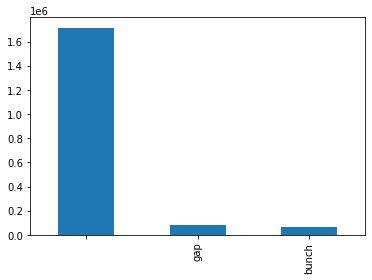

In [45]:
above_freezing['BUNCH/GAP'].value_counts().plot(kind='bar');

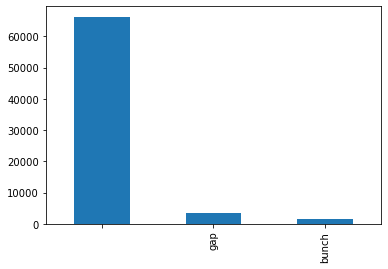

In [46]:
below_freezing['BUNCH/GAP'].value_counts().plot(kind='bar');

In [49]:
# exit_df['Exit Reason'].value_counts(normalize = True)
above_freezing['BUNCH/GAP'].value_counts(normalize=True)

         0.920348
gap      0.043758
bunch    0.035895
Name: BUNCH/GAP, dtype: float64

In [50]:
below_freezing['BUNCH/GAP'].value_counts(normalize=True)

         0.927091
gap      0.048909
bunch    0.024000
Name: BUNCH/GAP, dtype: float64

In [52]:
percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
include = 'all'
above_freezing.mean()

C:\Users\Rebecca Wolfe\AppData\Local\Temp\ipykernel_16788\4001451081.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  above_freezing.mean()


temp    66.980593
dtype: float64

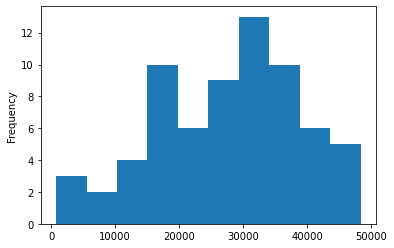

In [54]:
above_freezing['temp'].value_counts().plot(kind='hist');

In [ ]:
merge_df_b= merge_df_a[['NEW_DATE', 'HOUR','DATE','Date', 'ROUTE_ABBR','TRIP_ID',
       'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV',
       'temp', 'heat_index', 'precip_hrly']]

In [61]:
freezing_rain = below_freezing[['temp','precip_hrly', 'BUNCH/GAP']]
freezing_rain

,temp,precip_hrly,BUNCH/GAP
396440,14.0,0.0,
395174,14.0,0.0,
397730,14.0,0.0,
395177,14.0,0.0,
397179,14.0,0.0,gap
...,...,...,...
418187,31.0,0.0,bunch
772077,31.0,0.0,
523648,31.0,0.0,
571034,31.0,0.0,


In [73]:
#above_freezing=merge_df_b.loc[merge_df_b['temp']>32]

freezing_rain = below_freezing.loc[below_freezing['precip_hrly']>0]
freezing_rain.head()

,NEW_DATE,HOUR,DATE,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT,BUNCH/GAP
388653,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,52,304648,FROM DOWNTOWN,17:05:00,17:19:30,17:19:30,-14.50,10.0,0.200000,-9.800000,22.0,22.0,0.01,-98.00000,bunch
393820,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,56,305441,FROM DOWNTOWN,17:45:00,17:42:50,17:44:42,0.30,10.0,22.433333,12.433333,22.0,22.0,0.01,124.33333,gap
391992,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,56,305136,FROM DOWNTOWN,17:55:00,17:52:12,17:55:42,-0.70,10.0,20.283333,10.283333,22.0,22.0,0.01,102.83333,gap
389090,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,52,304694,TO DOWNTOWN,17:21:00,17:23:15,17:23:15,-2.25,10.0,23.016666,13.016666,22.0,22.0,0.01,130.16666,gap
382097,2022-01-06,17,2022-01-06,2022-01-06 17:30:00,22,302573,FROM DOWNTOWN,17:40:00,17:30:17,17:41:00,-1.00,25.0,0.500000,-24.500000,22.0,22.0,0.01,-98.00000,bunch


In [70]:
below_freezing['precip_hrly'].value_counts()

0.00    68453
0.01     1026
0.02      846
0.03      483
0.07      336
0.06      315
Name: precip_hrly, dtype: int64

In [75]:
freezing_rain['BUNCH/GAP'].value_counts()

         2394
gap       373
bunch     239
Name: BUNCH/GAP, dtype: int64

In [76]:
freezing_rain['BUNCH/GAP'].value_counts(normalize=True)

         0.796407
gap      0.124085
bunch    0.079508
Name: BUNCH/GAP, dtype: float64

<AxesSubplot:>

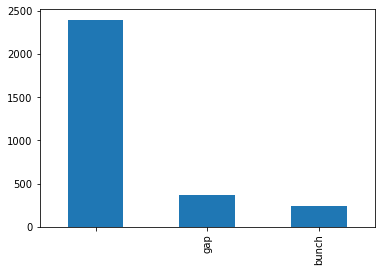

In [77]:
freezing_rain['BUNCH/GAP'].value_counts().plot(kind='bar')

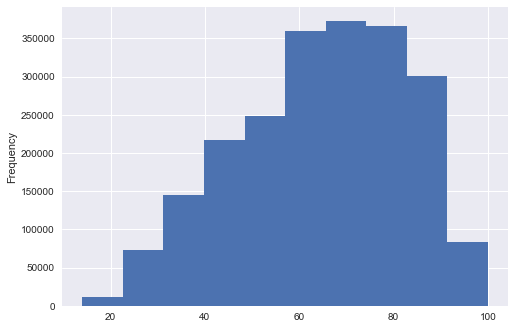

In [90]:
merge_df['temp'].plot(kind='hist')
plt.style.use('seaborn')




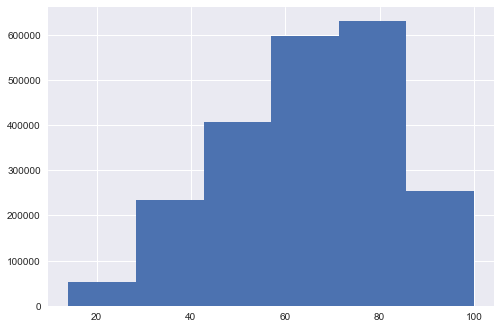

In [96]:
# plt.hist(df_2014['Internet_Users_Pct'], bins=8)


plt.hist(merge_df['temp'], bins=6)
plt.show()

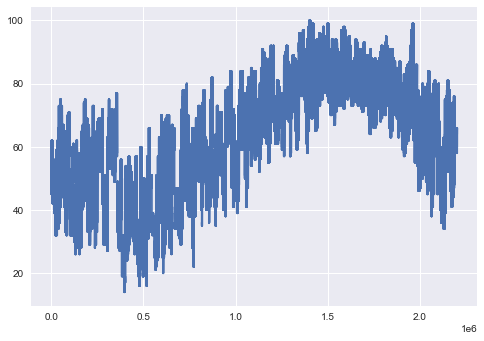

In [106]:

plt.plot(merge_df['temp'])
plt.show()

<AxesSubplot:>

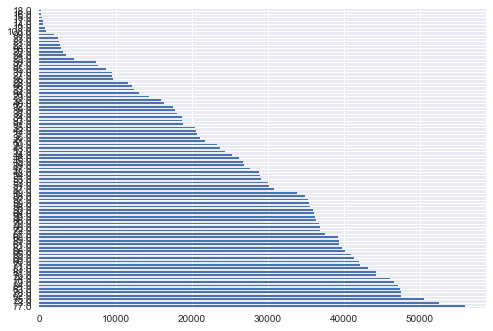

In [108]:
merge_df['temp'].value_counts().plot(kind='barh')

In [99]:
merge_df_b.head()

,NEW_DATE,HOUR,DATE,Date,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT,BUNCH/GAP
0,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:10:00,13:59:21,14:12:00,-2.000000,14.0,15.983333,1.983333,62.0,62.0,0.0,14.166664,
1,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:20:00,14:23:21,14:23:21,-3.350000,14.0,17.333333,3.333333,62.0,62.0,0.0,23.809521,
2,2021-11-01,14,2021-11-01,2021-11-01 14:53:00,7,297750,TO DOWNTOWN,14:39:00,14:36:46,14:59:11,-20.183333,NaN,NaN,NaN,62.0,62.0,0.0,NaN,
3,2021-11-01,15,2021-11-01,2021-11-01 15:53:00,50,297749,TO DOWNTOWN,15:10:00,15:04:31,15:10:17,-0.283333,NaN,NaN,NaN,62.0,62.0,0.0,NaN,
4,2021-11-01,15,2021-11-01,2021-11-01 15:53:00,50,297749,TO DOWNTOWN,15:27:00,15:16:59,15:16:59,10.016666,NaN,NaN,NaN,62.0,62.0,0.0,NaN,


<AxesSubplot:xlabel='temp', ylabel='DEV_PERCENT'>

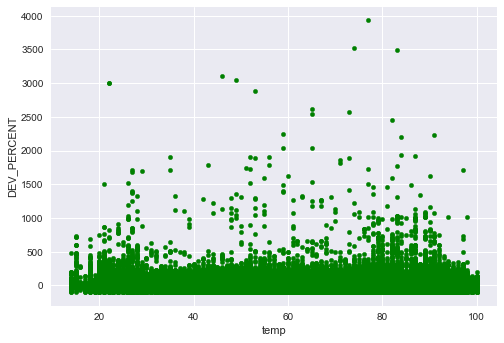

In [100]:
merge_df_b.plot.scatter('temp', 'DEV_PERCENT', s=None, c='green')



In [105]:
below_freezing.corr()


,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,temp,heat_index,precip_hrly,DEV_PERCENT
ROUTE_ABBR,1.000000,0.575958,-0.027972,-0.352988,-0.293590,-0.010254,0.017753,0.017753,0.004318,0.012195
TRIP_ID,0.575958,1.000000,-0.043341,-0.279036,-0.229919,-0.006982,0.005403,0.005403,0.004501,0.012071
ADHERENCE,-0.027972,-0.043341,1.000000,0.019682,-0.054314,-0.130051,0.016320,0.016320,-0.256190,-0.148522
SCHEDULED_HDWY,-0.352988,-0.279036,0.019682,1.000000,0.816348,-0.006060,-0.039119,-0.039119,-0.050521,-0.051177
ACTUAL_HDWY,-0.293590,-0.229919,-0.054314,0.816348,1.000000,0.572603,-0.085874,-0.085874,-0.000677,0.470898
HDWY_DEV,-0.010254,-0.006982,-0.130051,-0.006060,0.572603,1.000000,-0.109822,-0.109822,0.047660,0.887925
temp,0.017753,0.005403,0.016320,-0.039119,-0.085874,-0.109822,1.000000,1.000000,0.016164,-0.122434
heat_index,0.017753,0.005403,0.016320,-0.039119,-0.085874,-0.109822,1.000000,1.000000,0.016164,-0.122434
precip_hrly,0.004318,0.004501,-0.256190,-0.050521,-0.000677,0.047660,0.016164,0.016164,1.000000,0.065540
DEV_PERCENT,0.012195,0.012071,-0.148522,-0.051177,0.470898,0.887925,-0.122434,-0.122434,0.065540,1.000000
